In [51]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (15.0, 15.0)

In [52]:
T = 100.
dt = 1E-3
N = int(T/dt)
TIME = np.linspace(0, T, N)

In [53]:
k = 0.04, 5, 140
u0 = -20
v0 = -70
v_thr = 30
a, b, c, d = 0.02, 0.2, -65, 6
# a, b, c, d = -0.026, -1, -45, 0

$$
\dot{v} = k_1 \cdot v^2 + k_2 \cdot v + k_3 - u + I
$$
$$
\dot{u} = a \cdot \left( b \cdot v - u \right)
$$

In [54]:
I_crit = 4
v2 = -60
u2 = -12
v_ = 0.9
u_ = 0.18

# I_crit = 85
# v2 = -75
# u2 = 75
# v_ = 4
# u_ = -0.1

# v_ = 0.980581
# u_ = 0.196116

defaultdict(<class 'int'>, {80: 34, 50: 21, 5: 3, 70: 30, 40: 17, 90: 38, 95: 40, 60: 26, 30: 13, 15: 7})
[5, 15, 30, 40, 50, 60, 70, 80, 90, 95]
[0.03, 0.07, 0.13, 0.17, 0.21, 0.26, 0.3, 0.34, 0.38, 0.4]


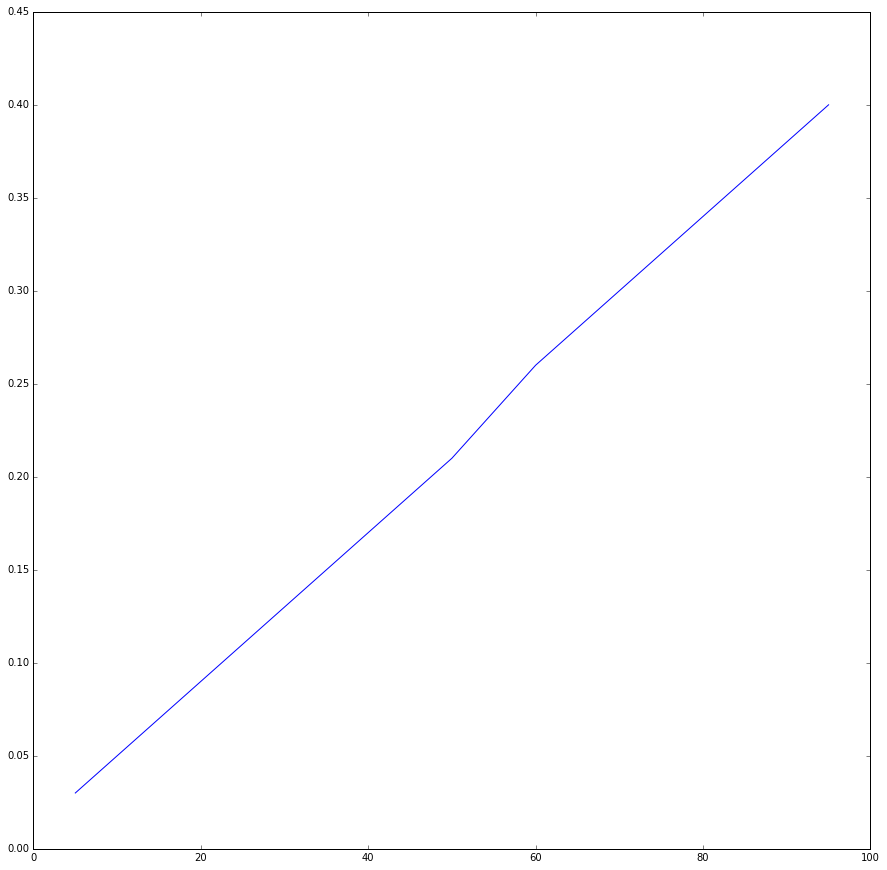

In [58]:
k1, k2, k3 = k
start_pairs = [(v2 + 2 * v_, u2 + 2 * u_, I_crit), (v2 - 2 * v_, u2 - 2 * u_, I_crit),               
               (v0, u0, I_crit), (v0, u0, 5), (v0, u0, 15), (v0, u0, 30), (v0, u0, 40),
               (v0, u0, 50), (v0, u0, 60), (v0, u0, 70), (v0, u0, 80), (v0, u0, 90), (v0, u0, 95),
               (-90, -50, 0), (100, 50, 0), (5, 10, 0)]

from collections import defaultdict
map_i_pichk = defaultdict(int)

def iter_one(v, u, I):
    if v >= v_thr:
        if I > I_crit:
            map_i_pichk[I] += 1
        return c, u + d
    else:
        dv = k1 * v * v + k2 * v + k3 - u + I
        du = a * (b * v - u)
        return v + dv * dt, u + du * dt

def iter_seq(v_0, u_0, I):
    vs = []
    us = []
    v_i, u_i = v_0, u_0
    #print('#gen for: %s / %s / %s ' % (v_0, u_0, I))
    for _ in range(N):
        v_i, u_i = iter_one(v_i, u_i, I)
        vs.append(v_i)
        us.append(u_i)
    return (vs, us)

seq_pair_dict = {}
for pair in start_pairs:
    seq_pair_dict[pair] = iter_seq(*pair)
    
print(map_i_pichk)
fig = plt.figure(1)
i_values = sorted(list(map_i_pichk.keys()))
v_values = sorted([x / T for x in list(map_i_pichk.values())])
print(i_values)
print(v_values)
plt.plot(i_values, v_values)

In [59]:
def get_plot(pair, seq):
    vs, us = seq    
    fig = plt.figure(1)
    fig.suptitle('v_0 = %4.2f; u_0 = %4.2f; I = %4.2f' % pair, fontsize = 24)

    plt.subplot(221)
    plt.plot(TIME, vs)

    plt.subplot(222)
    plt.plot(TIME, us)
    plt.show()

    plt.subplot(212)
    plt.plot(vs, us)

    plt.show()

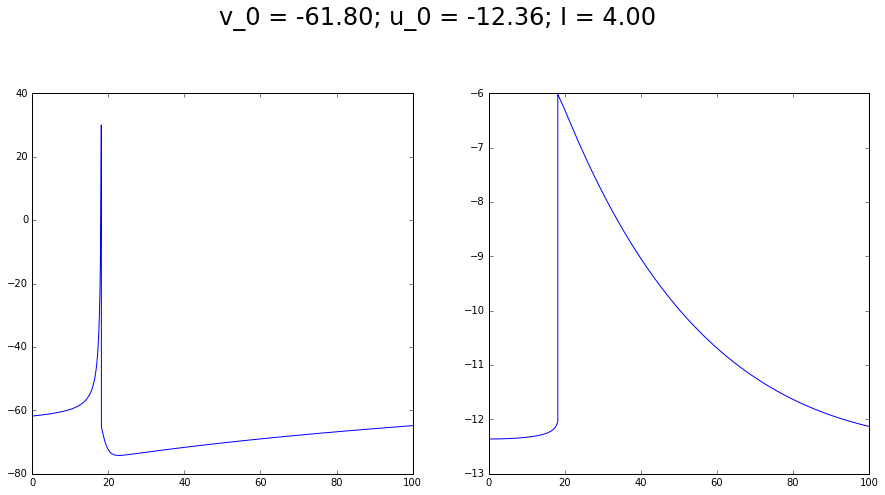

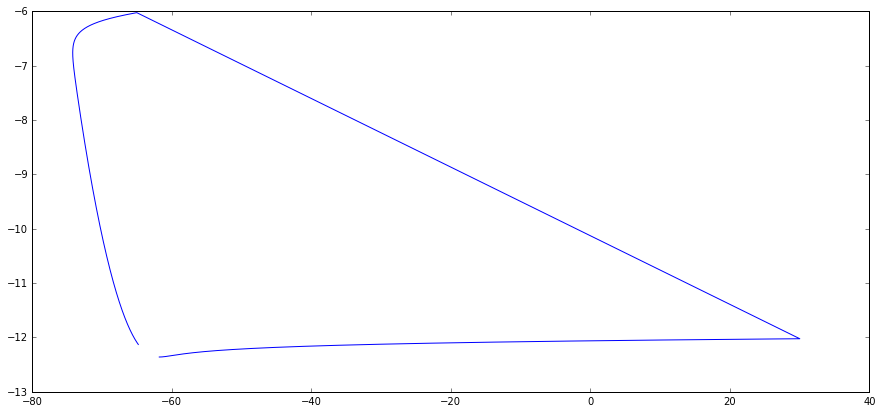

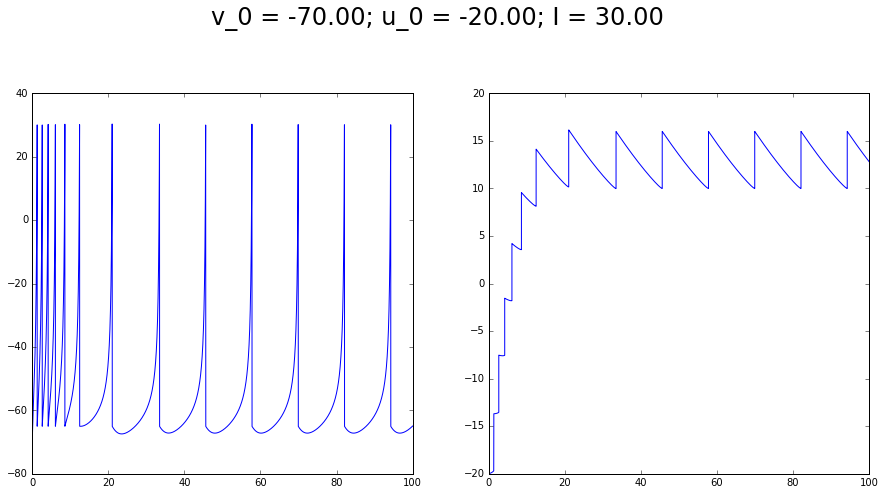

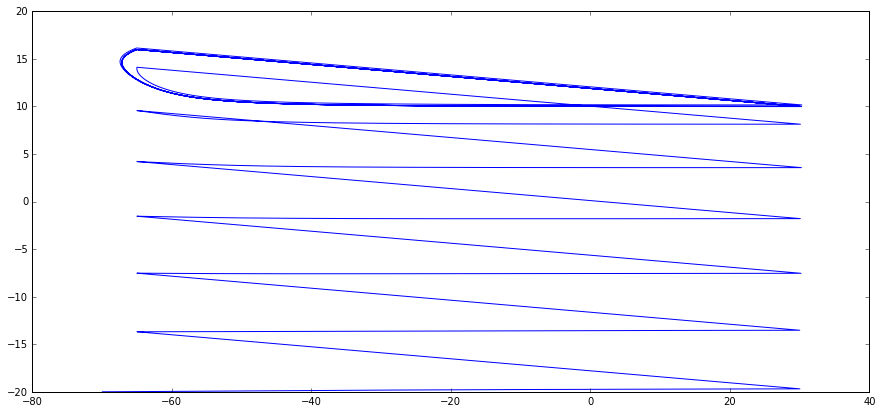

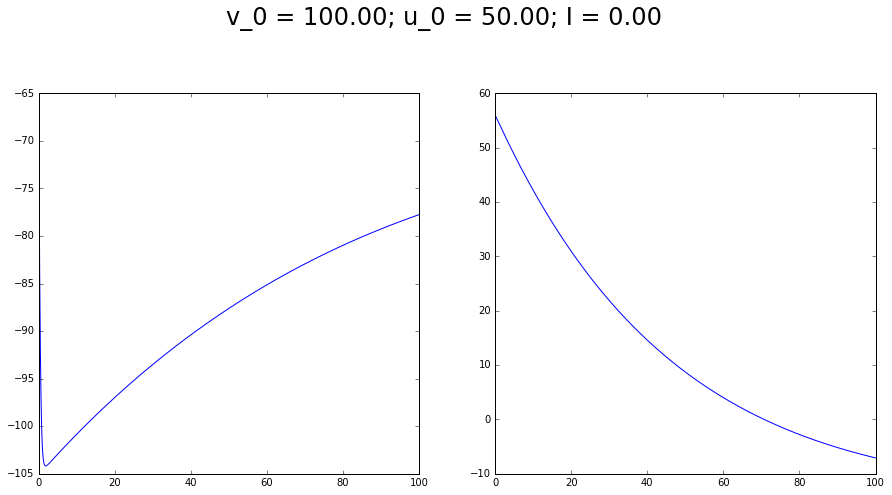

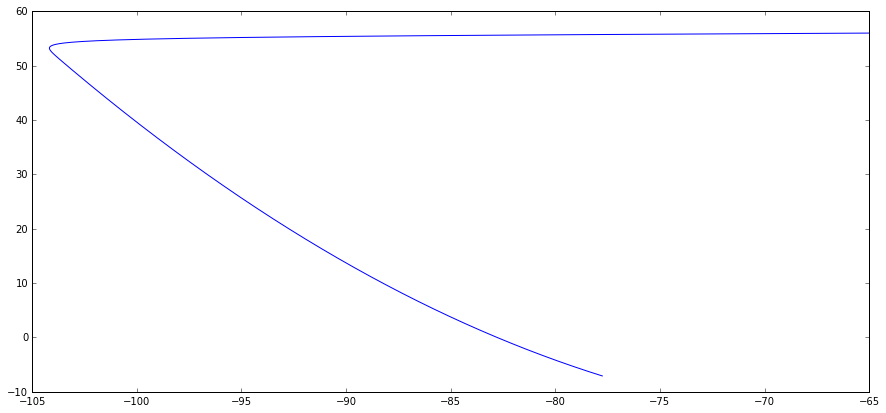

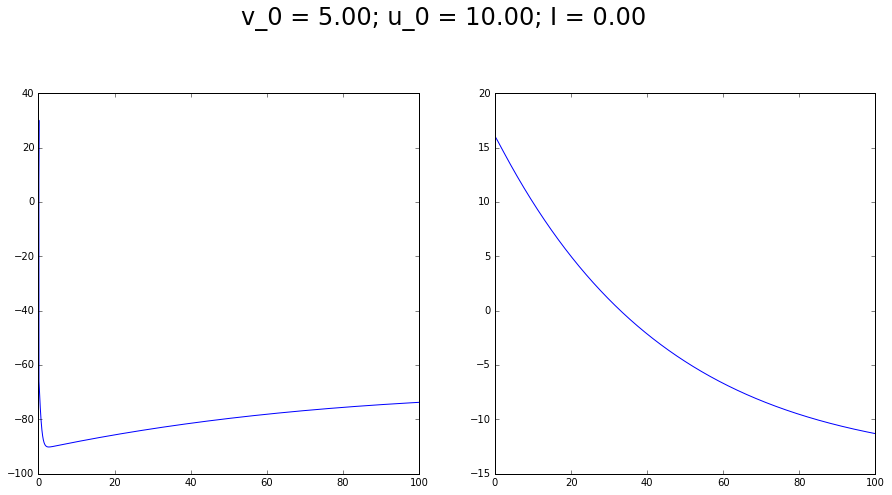

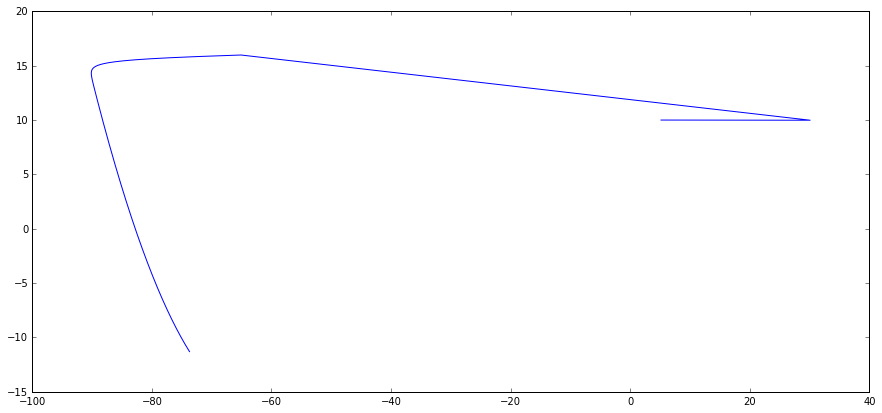

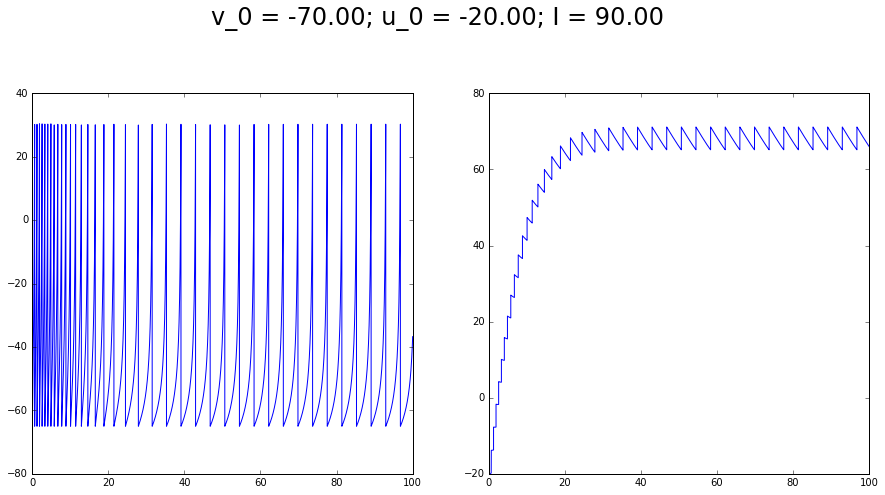

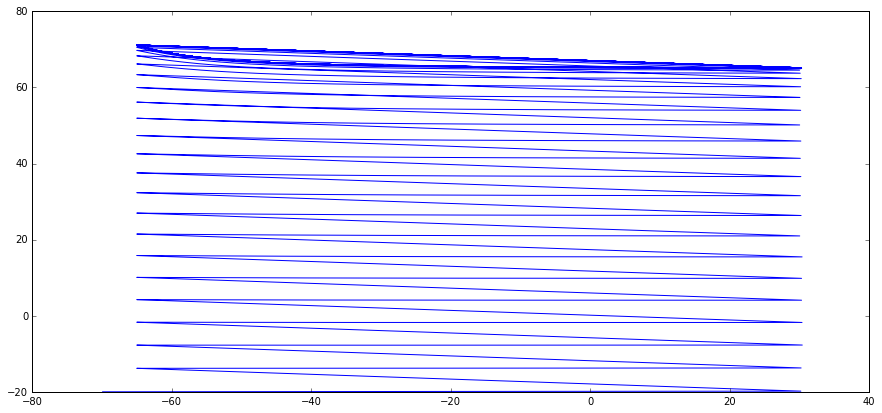

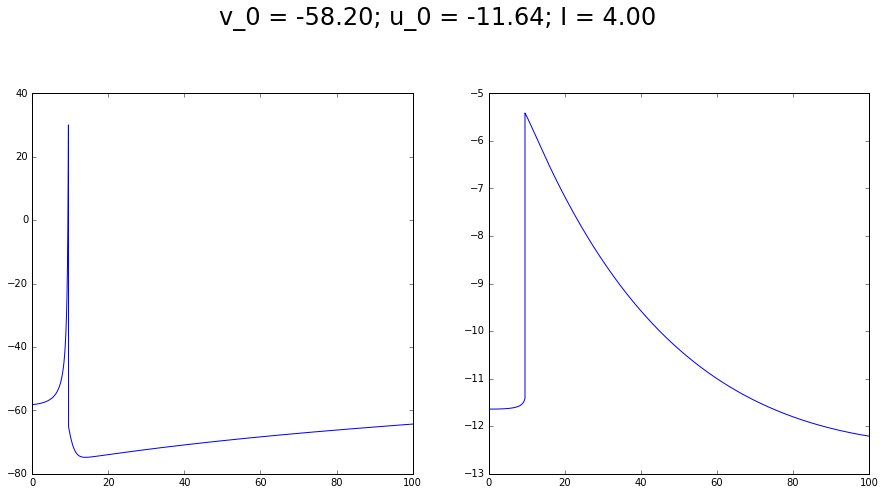

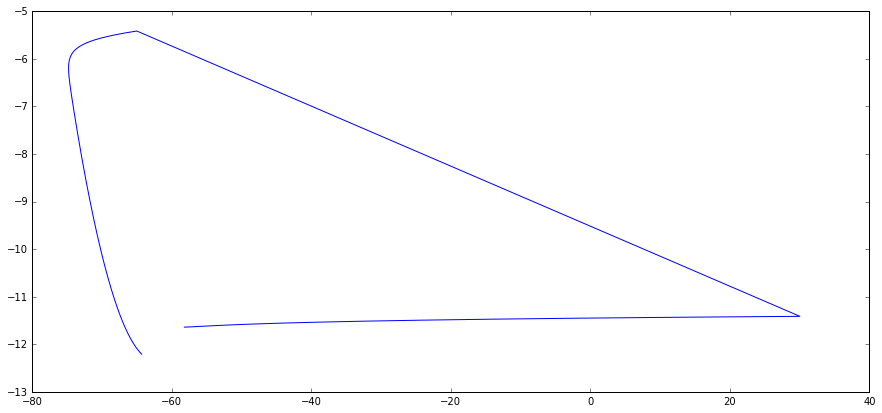

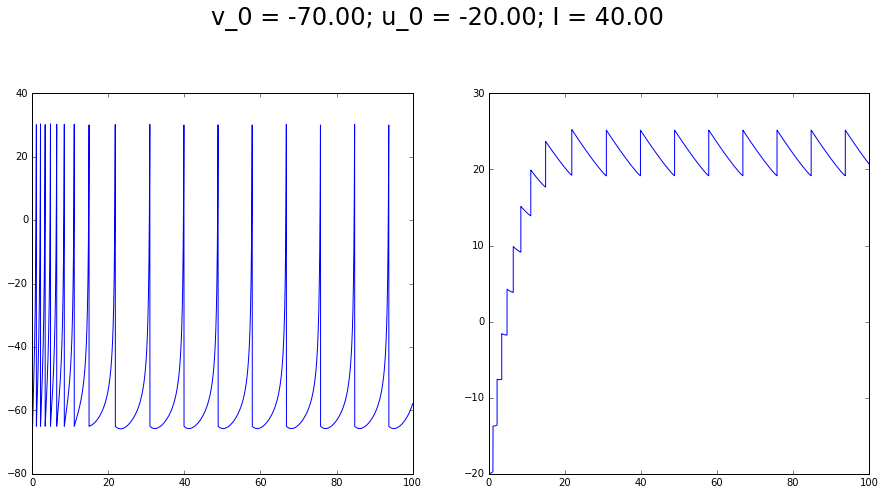

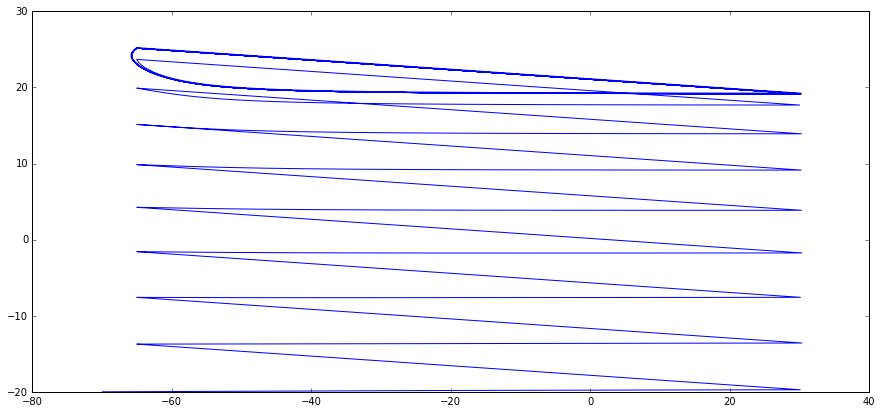

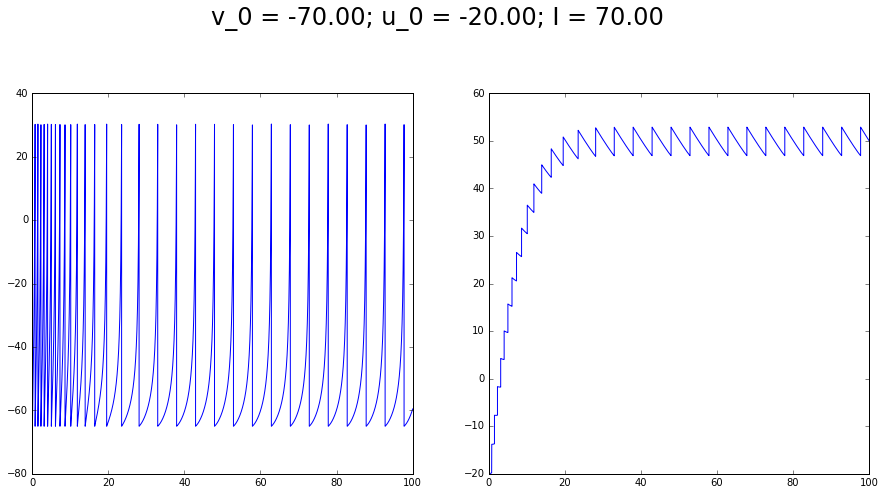

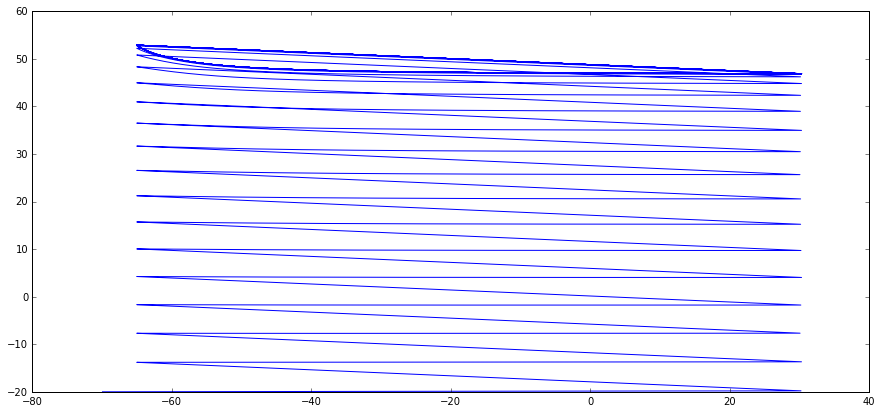

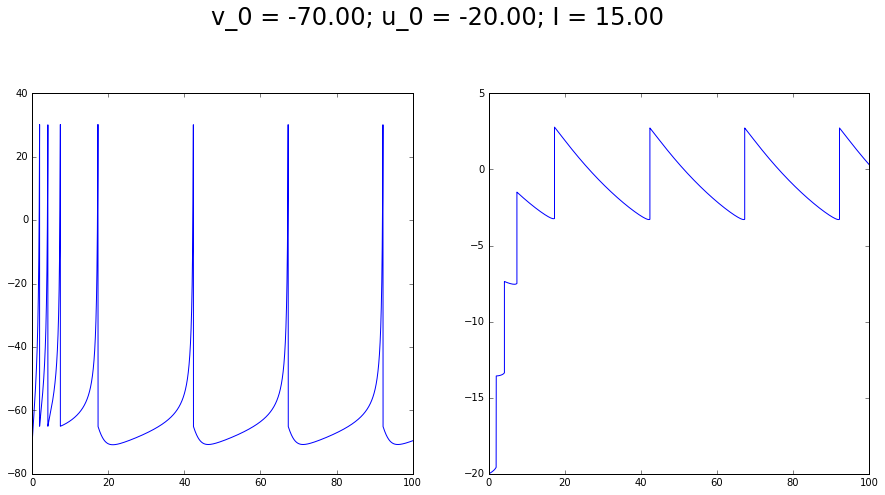

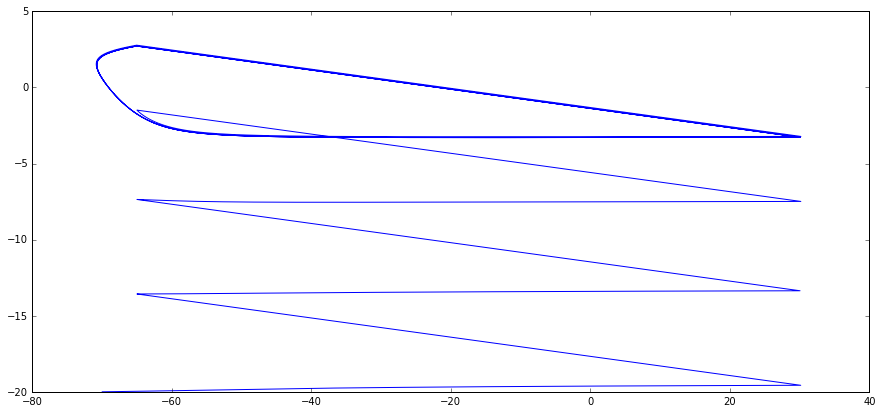

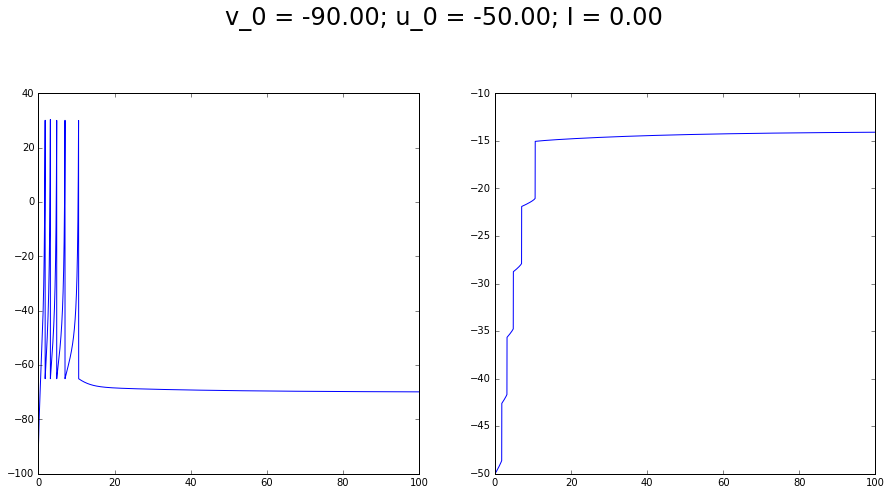

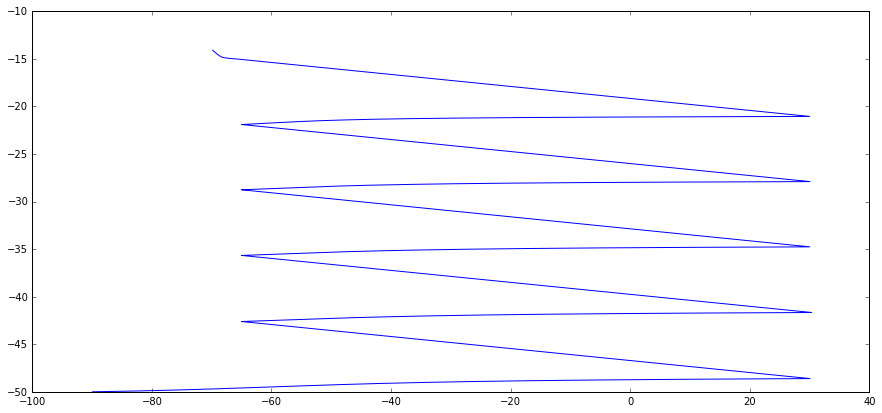

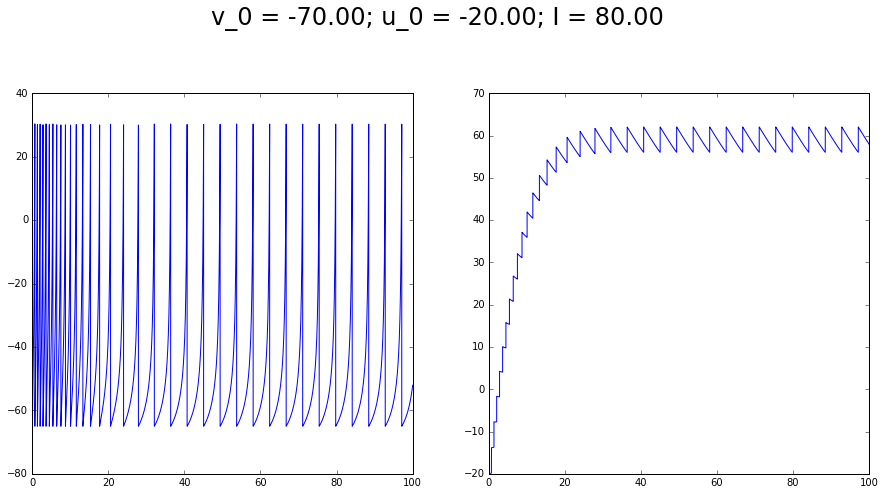

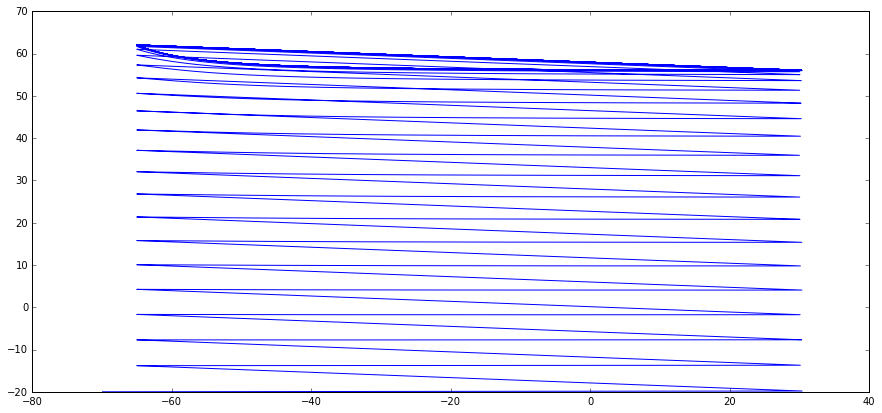

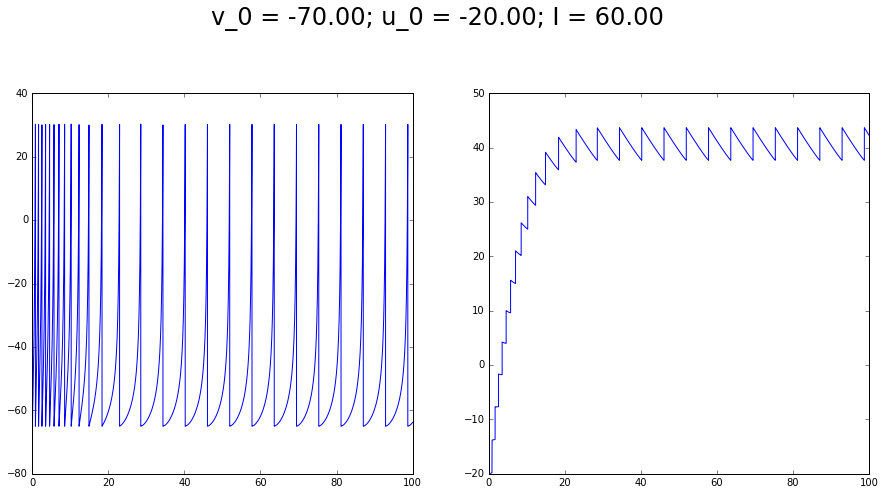

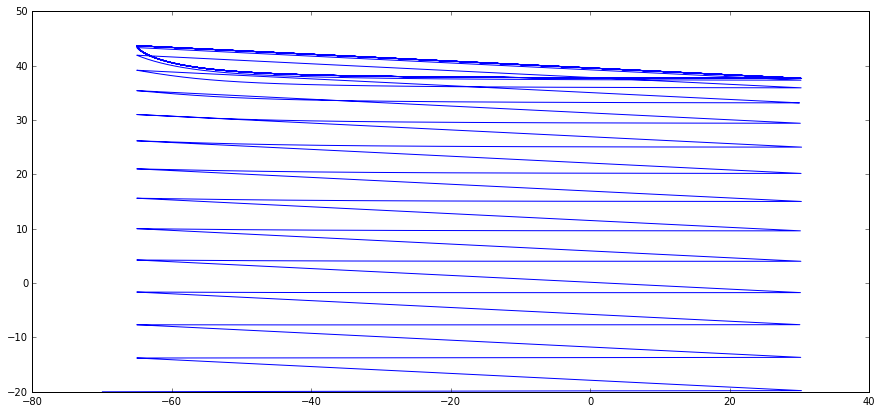

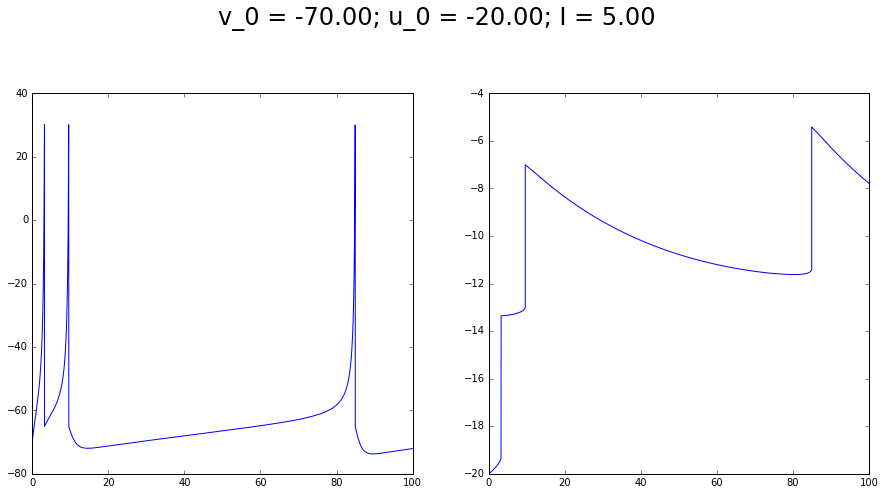

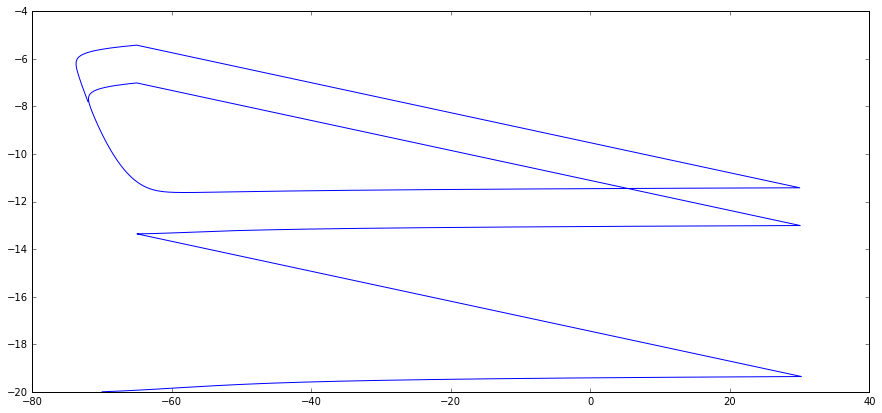

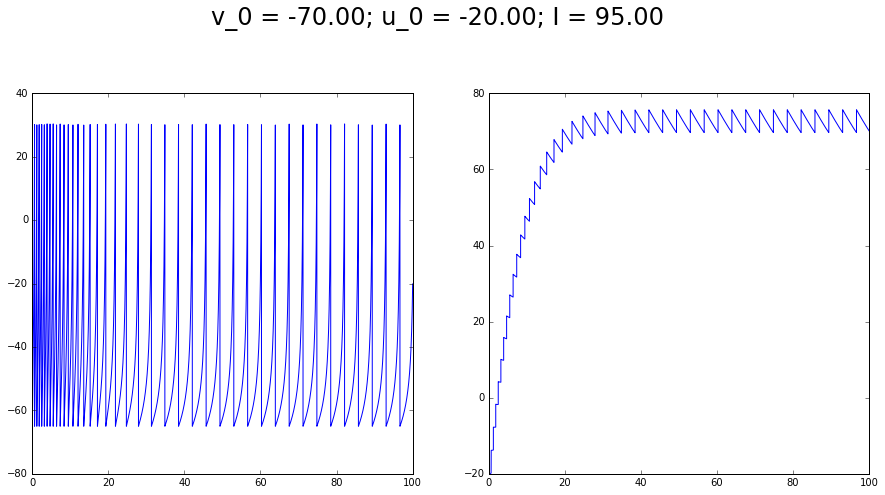

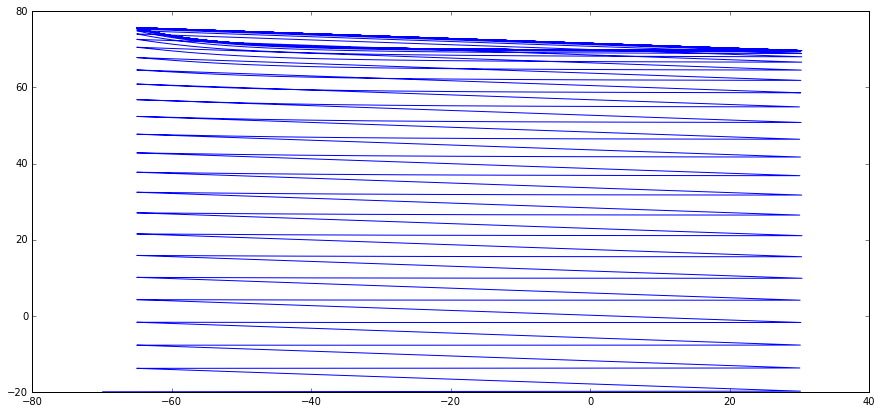

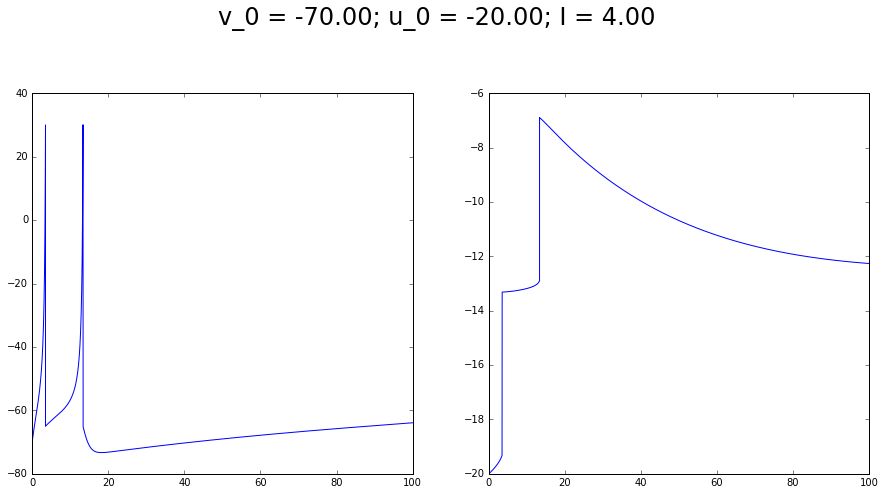

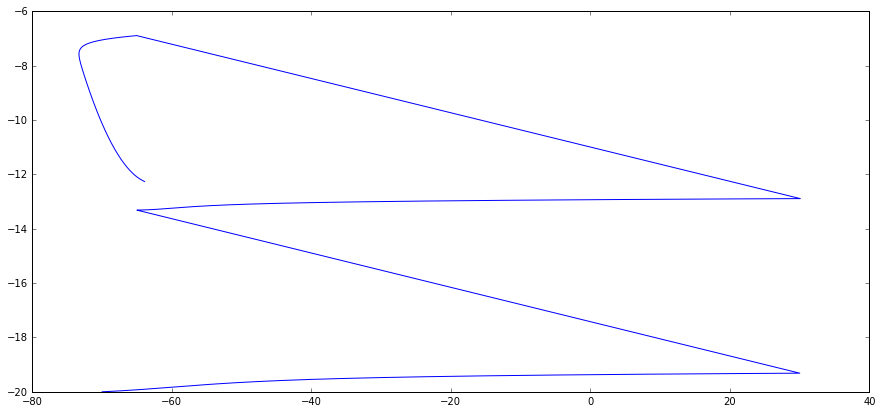

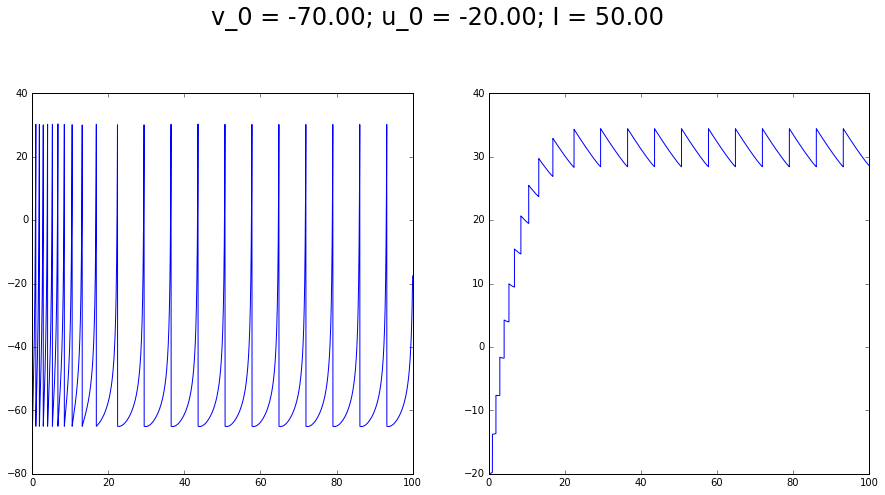

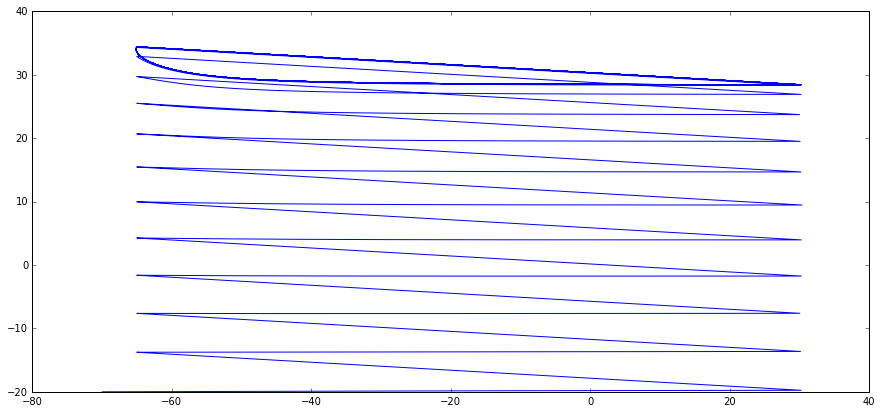

In [60]:
for ke, v in seq_pair_dict.items():
    get_plot(ke, v)